In [1]:
import tensorflow as tf
import numpy as np
import tensorflow_io as tfio
import dataLoader
import modelo
import seaborn as sns
import matplotlib.pyplot as plt
import evaluador

### Learning curve

In [ ]:
metadata_path = "..\\metadata.csv"
audio_dir = "..\\dataset\\audios"

audio_dataset = dataLoader.AudioDataset(metadata_path, audio_dir)
train_ds, val_ds, test_ds = audio_dataset.preprocess_datasets()

classifier = modelo.Clasificador()
classifier.units = 100
classifier.compilar()
history = classifier.train(train_ds, val_ds)

loss_func = []
valloss_func = []
lrs = []

i = 10**(-5)
for cicle in range(200):
    classifier.alpha = i
    classifier.compilar()
    history = classifier.train(train_ds, val_ds)
    
    loss_func.append(history.history['loss'][-21])
    valloss_func.append(history.history['val_loss'][-21])
    lrs.append(i)

    i *= 10**(np.log10(10**4)/200)
    

Epoch 1/60
282/282 [==============================] - 183s 546ms/step - loss: 0.2657 - Accuracy: 0.9085 - Precision: 0.8305 - Recall: 0.7463 - TP: 2516.5100 - TN: 4737.6802 - FP: 909.3200 - FN: 855.4900 - val_loss: 0.1511 - val_Accuracy: 0.9613 - val_Precision: 0.9056 - val_Recall: 0.8499 - val_TP: 683.3200 - val_TN: 1005.0000 - val_FP: 101.0000 - val_FN: 120.6800
Epoch 2/60
282/282 [==============================] - 1s 4ms/step - loss: 0.1429 - Accuracy: 0.9625 - Precision: 0.9049 - Recall: 0.8595 - TP: 2898.1699 - TN: 5229.3701 - FP: 417.6300 - FN: 473.8300 - val_loss: 0.1134 - val_Accuracy: 0.9660 - val_Precision: 0.9259 - val_Recall: 0.8898 - val_TP: 715.4200 - val_TN: 1037.7800 - val_FP: 68.2200 - val_FN: 88.5800
Epoch 3/60
282/282 [==============================] - 1s 4ms/step - loss: 0.1177 - Accuracy: 0.9676 - Precision: 0.9165 - Recall: 0.8888 - TP: 2997.1201 - TN: 5314.2598 - FP: 332.7400 - FN: 374.8800 - val_loss: 0.0995 - val_Accuracy: 0.9696 - val_Precision: 0.9369 - val_R

In [6]:
d

,Learning Rate,Loss,Validation Loss
0,0.000010,0.063204,0.072708
1,0.000010,0.062265,0.072777
2,0.000011,0.061100,0.072938
3,0.000011,0.060126,0.073151
4,0.000012,0.059590,0.073328
...,...,...,...
195,0.079433,0.293638,0.369796
196,0.083176,0.452777,0.391335
197,0.087096,0.292654,0.378420
198,0.091201,0.609770,0.435797


Text(0.5, 0, 'Tasa de aprendizaje')

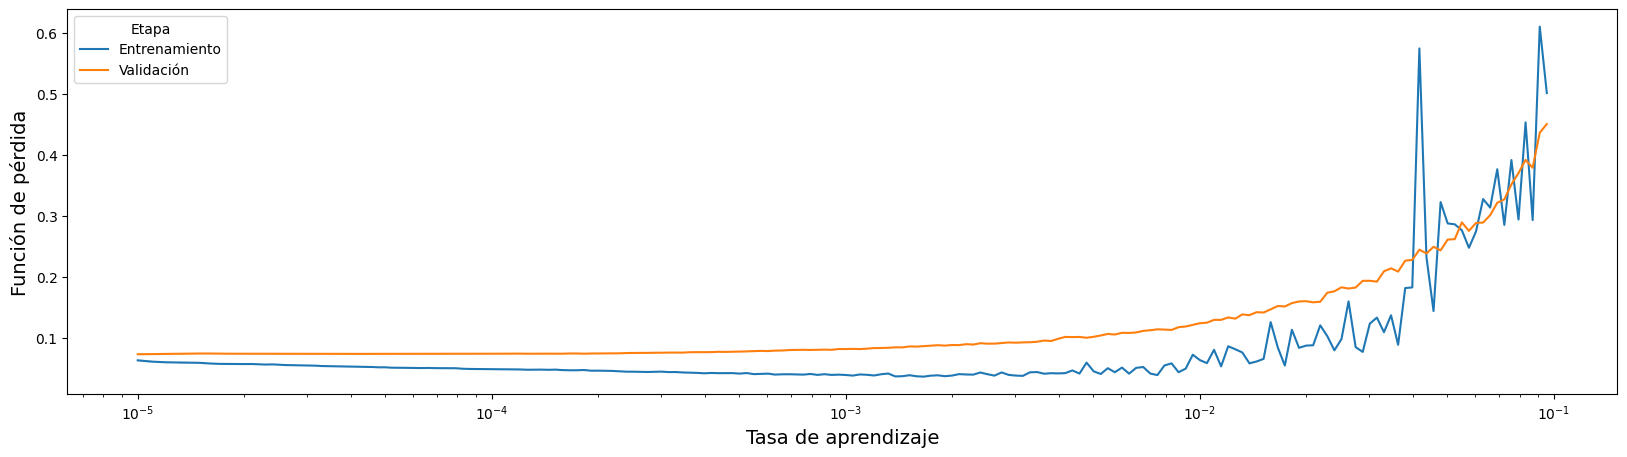

In [9]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

d = pd.read_excel('..\\resultados.xlsx', sheet_name='learning rates', usecols='B:D')
d.columns = ['Tasa de aprendizaje', 'Entrenamiento', 'Validación']
plt.figure(figsize=(20,5))

sns.lineplot(data=pd.melt(d, ['Tasa de aprendizaje'], var_name='Etapa'), x='Tasa de aprendizaje', y='value', hue='Etapa')
plt.xscale('log')
plt.ylabel('Función de pérdida', fontsize=14)
plt.xlabel('Tasa de aprendizaje', fontsize=14)
#plt.legend(['asd', 'da'])
#sns.lineplot(data=d, x='Learning Rate', y='Validation Loss')


(0.0, 0.2)

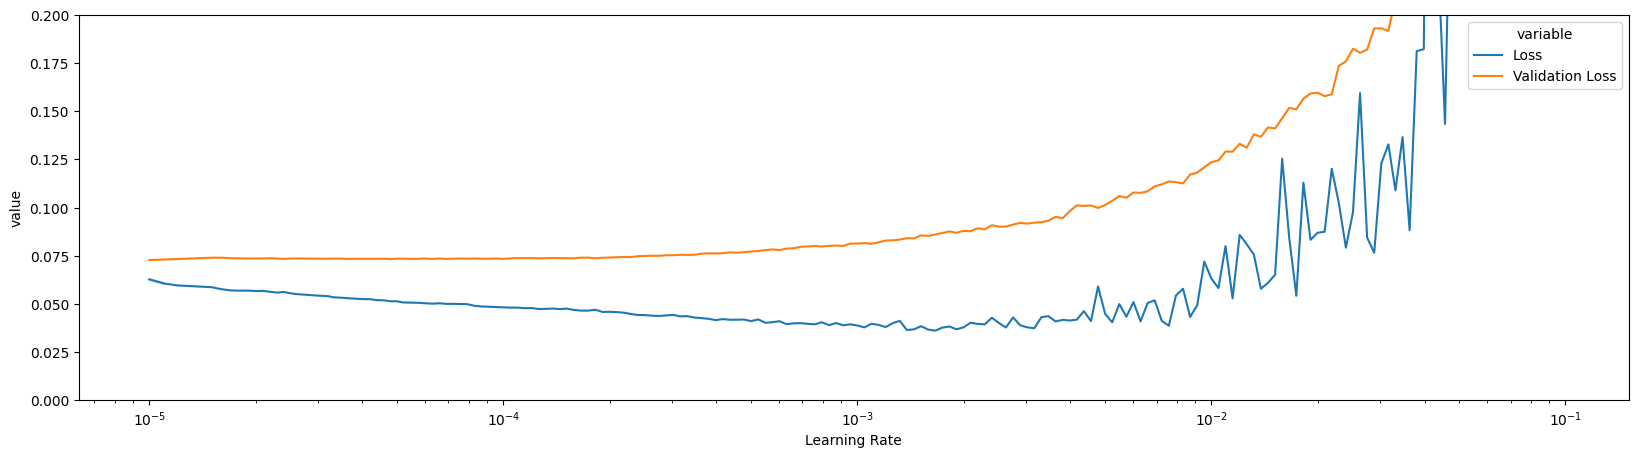

In [16]:
plt.figure(figsize=(20,5))

sns.lineplot(data=pd.melt(d, ['Learning Rate']), x='Learning Rate', y='value', hue='variable')
plt.xscale('log')
plt.ylim([0,0.2])
#plt.axhline(0.075)


In [35]:
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns

# Display the entire DataFrame
display(lrs)

pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

,Learning Rate,Loss,Validation Loss
0,0.000010,0.063204,0.072708
1,0.000010,0.062265,0.072777
2,0.000011,0.061100,0.072938
3,0.000011,0.060126,0.073151
4,0.000012,0.059590,0.073328
5,0.000013,0.059379,0.073486
6,0.000013,0.059111,0.073596
7,0.000014,0.058949,0.073716
8,0.000014,0.058936,0.073739
9,0.000015,0.058671,0.073979


### Entrenamiento

In [2]:
metadata_path = "..\\metadata.csv"
audio_dir = "..\\dataset\\audios"

audio_dataset = dataLoader.AudioDataset(metadata_path, audio_dir, BATCH_SIZE=32)
train_ds, val_ds, test_ds = audio_dataset.preprocess_datasets()

classifier = modelo.Clasificador()
classifier.units = 100
classifier.alpha = 0.001
classifier.compilar()
history = classifier.train(train_ds, val_ds)

Epoch 1/60
282/282 [==============================] - 123s 366ms/step - loss: 0.2287 - Accuracy: 0.9338 - Precision: 0.8589 - Recall: 0.7714 - TP: 2601.1299 - TN: 4913.7300 - FP: 733.2700 - FN: 770.8700 - val_loss: 0.1379 - val_Accuracy: 0.9644 - val_Precision: 0.9103 - val_Recall: 0.8631 - val_TP: 693.9100 - val_TN: 1016.5200 - val_FP: 89.4800 - val_FN: 110.0900
Epoch 2/60
282/282 [==============================] - 1s 2ms/step - loss: 0.1354 - Accuracy: 0.9658 - Precision: 0.9074 - Recall: 0.8703 - TP: 2934.5400 - TN: 5255.2998 - FP: 391.7000 - FN: 437.4600 - val_loss: 0.1113 - val_Accuracy: 0.9691 - val_Precision: 0.9319 - val_Recall: 0.8893 - val_TP: 715.0100 - val_TN: 1043.8400 - val_FP: 62.1600 - val_FN: 88.9900
Epoch 3/60
282/282 [==============================] - 1s 2ms/step - loss: 0.1152 - Accuracy: 0.9683 - Precision: 0.9213 - Recall: 0.8923 - TP: 3008.8101 - TN: 5341.9102 - FP: 305.0900 - FN: 363.1900 - val_loss: 0.0978 - val_Accuracy: 0.9717 - val_Precision: 0.9366 - val_Re

In [1]:
# classifier.exportar_entrenamiento(history, '.\\entrenamiento\\historia_entrenamiento')
# import pickle
# with open('training_history', 'rb') as file:
#     historia = pickle.load(file)

NameError: name 'classifier' is not defined

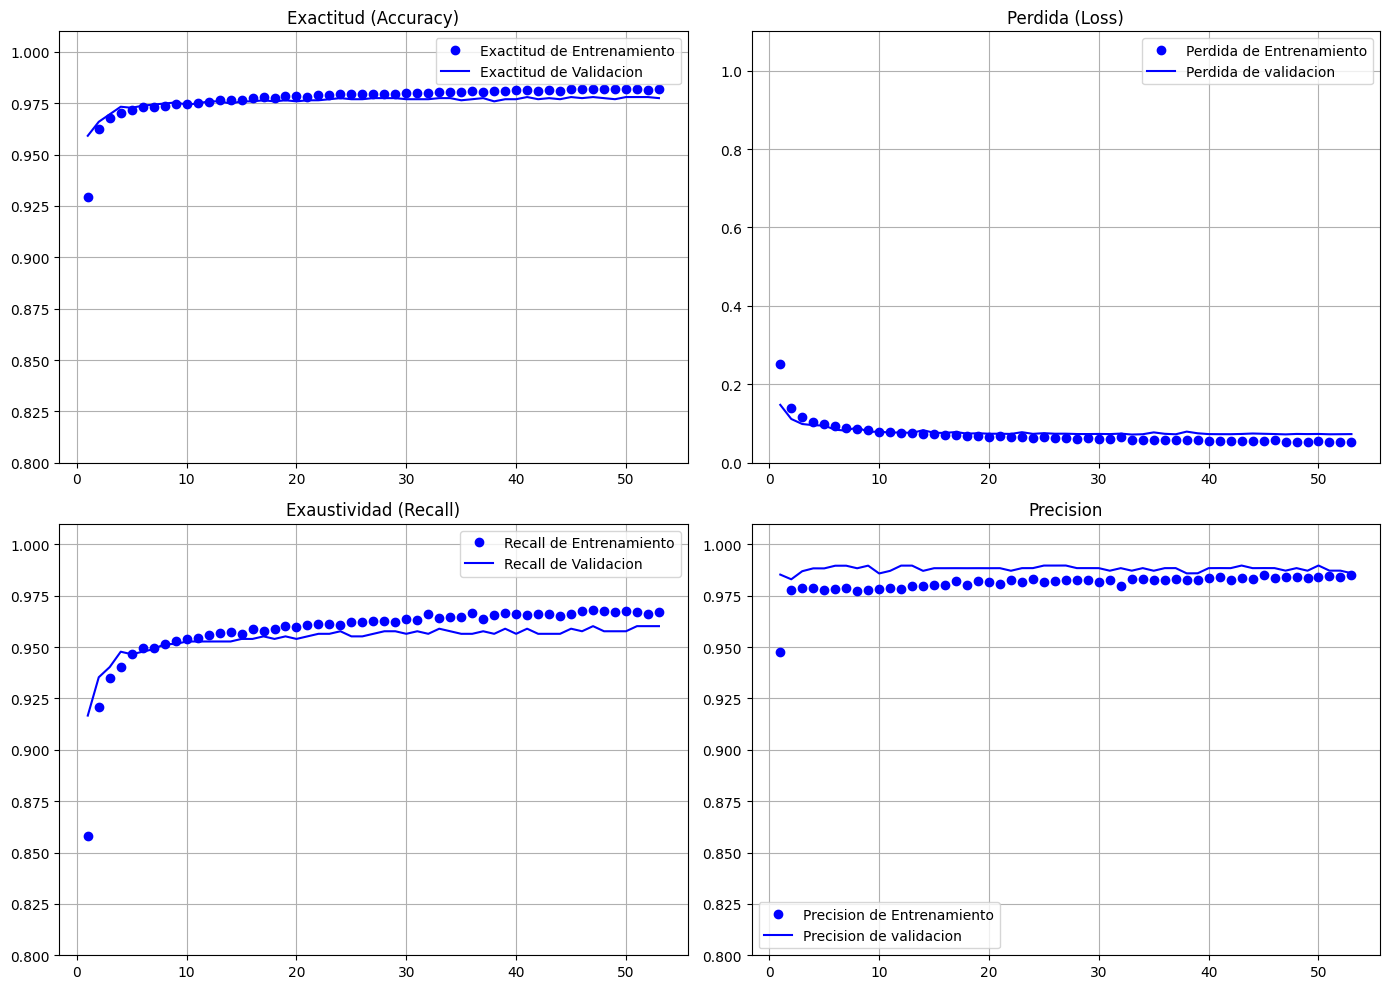

In [3]:
classifier.plot_training_curves(history)

In [7]:
dataLoader.yamnet_params.Params.BN

0.3

In [5]:
import pandas as pd
dic = {}
for key in ('loss', 'Accuracy', 'val_loss', 'val_Accuracy'):
    dic[key] = history.history[key]
df = pd.DataFrame(dic)
df

,loss,Accuracy,val_loss,val_Accuracy
0,0.244764,0.924825,0.149314,0.963351
1,0.139062,0.963300,0.109381,0.970157
2,0.115214,0.967402,0.097550,0.971204
3,0.105376,0.969065,0.089083,0.973822
4,0.097436,0.971172,0.085564,0.974869
5,0.091995,0.972281,0.083870,0.974346
6,0.088043,0.973168,0.086005,0.975393
7,0.085564,0.973944,0.080252,0.974869
8,0.081394,0.974831,0.077308,0.975393
9,0.081968,0.975053,0.078460,0.974869


### Evaluacion 

In [6]:
eval = evaluador.ClassifierEvaluator(classifier.model)
loss, bacc, precision, recall, F1, TP, TN, FP, FN = eval.evaluate(test_ds)

62/62 [==============================] - 42s 655ms/step - loss: 0.0918 - Accuracy: 0.9725 - Precision: 0.9523 - Recall: 0.9299 - TP: 686.2900 - TN: 1195.7600 - FP: 30.2400 - FN: 51.7100
Loss: 0.09
Accuracy: 0.97
Precision: 0.98
Recall: 0.95
F1: 0.96
TP:  699.0
TN:  1211.0
FP:  15.0
FN:  39.0


c:\Users\user\Documents\Tesis\codigo\evaluador.py:44: RuntimeWarning: invalid value encountered in true_divide
  F1 = (2 * precision * recall) / (precision + recall)


In [9]:
df = pd.DataFrame({'TP':TP, 'TN':TN, 'FP':FP, 'FN':FN})

pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns

# Display the entire DataFrame
display(df)

pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

,TP,TN,FP,FN
0,731.0,849.0,377.0,7.0
1,730.0,964.0,262.0,8.0
2,726.0,1036.0,190.0,12.0
3,725.0,1059.0,167.0,13.0
4,722.0,1086.0,140.0,16.0
5,721.0,1103.0,123.0,17.0
6,721.0,1110.0,116.0,17.0
7,720.0,1121.0,105.0,18.0
8,720.0,1126.0,100.0,18.0
9,720.0,1133.0,93.0,18.0


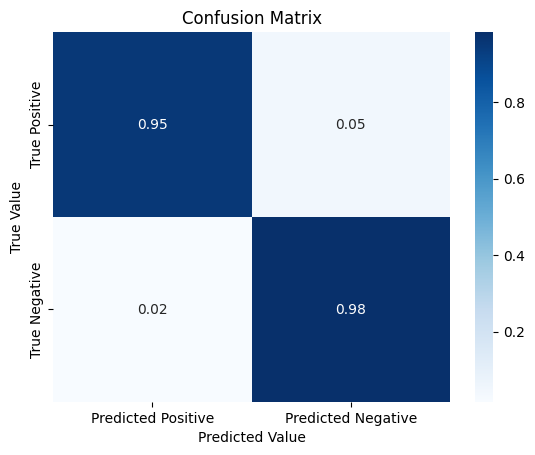

In [ ]:
eval.plot_confusion_matrix(TP, TN, FP, FN)

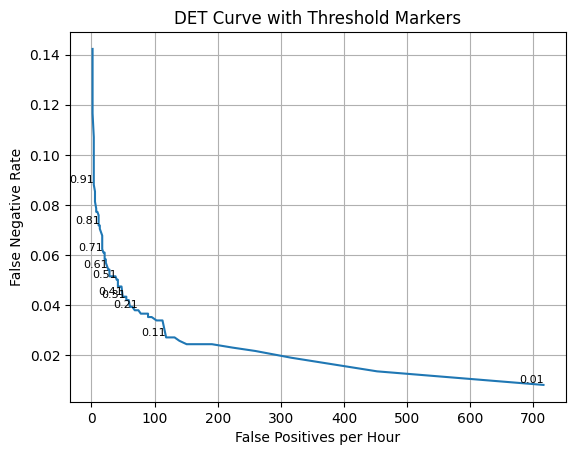

In [ ]:
eval.curva_det(TP, TN, FP, FN)

### Evaluacion en test set 2

In [9]:
dir_metadata = "..\\dataset\\sonidos_grabados\\mdgrabados.csv"
dir_audios =  "..\\dataset\\sonidos_grabados"

recorded_dataset = dataLoader.AudioDataset(dir_metadata, dir_audios, split=False)
test_ds2 = recorded_dataset.create_single_dataset()

In [10]:
eval = evaluador.ClassifierEvaluator(classifier.model)
loss, bacc, precision, recall, F1, TP, TN, FP, FN = eval.evaluate(test_ds2)

174/174 [==============================] - 73s 397ms/step - loss: 0.1235 - Accuracy: 0.9630 - Precision: 0.9396 - Recall: 0.8386 - TP: 978.6900 - TN: 4312.7500 - FP: 60.2500 - FN: 188.3100
Loss: 0.12
Accuracy: 0.96
Precision: 0.97
Recall: 0.85
F1: 0.91
TP:  997.0
TN:  4338.0
FP:  35.0
FN:  170.0


c:\Users\user\Documents\Tesis\codigo\evaluador.py:44: RuntimeWarning: invalid value encountered in true_divide
  F1 = (2 * precision * recall) / (precision + recall)


In [11]:
import pandas as pd
df = pd.DataFrame({'TP':TP, 'TN':TN, 'FP':FP, 'FN':FN})

pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns

# Display the entire DataFrame
display(df)

pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

,TP,TN,FP,FN
0,1128.0,3877.0,496.0,39.0
1,1117.0,4019.0,354.0,50.0
2,1110.0,4084.0,289.0,57.0
3,1108.0,4129.0,244.0,59.0
4,1102.0,4155.0,218.0,65.0
5,1095.0,4175.0,198.0,72.0
6,1090.0,4191.0,182.0,77.0
7,1088.0,4208.0,165.0,79.0
8,1085.0,4215.0,158.0,82.0
9,1080.0,4226.0,147.0,87.0


### Curvas nuevas

In [ ]:
metadata_path = "..\\metadata.csv"
audio_dir = "..\\dataset\\audios"

audio_dataset = dataLoader.AudioDataset(metadata_path, audio_dir, BATCH_SIZE=32)
train_ds, val_ds, test_ds = audio_dataset.preprocess_datasets()

for i in 
classifier = modelo.Clasificador()
classifier.units = 100
classifier.alpha = 0.001
classifier.compilar()
history = classifier.train(train_ds, val_ds)

### Distancias

In [33]:
m10 = load_wav_16k_mono('..\\dataset\\sonidos_grabados\\STE-002.wav')
m20 = load_wav_16k_mono('..\\dataset\\sonidos_grabados\\STE-004.wav')
m50 = load_wav_16k_mono('..\\dataset\\sonidos_grabados\\STE-005.wav')

def round_th(arr, th):
    return np.where(arr >= th, 1, 0)

def func(audio):
    preds = modelo_final(audio).numpy()
    labels = round_th(preds, 0.88)
    tot = labels.shape[0]
    pos = np.count_nonzero(labels)
    neg = tot-pos
    rec = pos / tot
    return tot, pos, neg, rec 

t10, p10, n10, r10 = func(m10)
t20, p20, n20, r20 = func(m20)
t50, p50, n50, r50 = func(m50)

dic = {'Distancia (m)': [10, 20, 50],
       'Total': [t10, t20, t50],
       'Positivos (%)': [p10*100/t10, p20*100/t20, p50*100/t50],
       'Negativos (%)': [n10*100/t10, n20*100/t20, n50*100/t50],
       'Exhaustividad': [r10, r20, r50]}

pd.DataFrame(dic)

,Distancia (m),Total,Positivos,Negativos,Exhaustividad
0,10,257,97.276265,2.723735,0.972763
1,20,341,97.067449,2.932551,0.970674
2,50,569,56.766257,43.233743,0.567663


### Yamnet vs clasificador

In [1]:
import os
import pandas as pd
import numpy as np

import tensorflow as tf
import tensorflow_io as tfio

from yamnet import params as yamnet_params
from yamnet import yamnet as yamnet_model

params = yamnet_params.Params(patch_hop_seconds=0.96)
yamnet = yamnet_model.yamnet_frames_model(params)
yamnet.load_weights('C:\\Users\\user\\Documents\\Tesis\\codigo\\yamnet\\yamnet.h5')
yamnet.traineable = False

clasificador = tf.keras.models.load_model('.\\modelo_final_bn')


In [ ]:
# Define the function to load and preprocess the audio
def load_wav_16k_mono(filename):
    """ Load a WAV file, convert it to a float tensor, resample to 16 kHz single-channel audio. """
    file_contents = tf.io.read_file(filename)
    wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)
    wav = tf.squeeze(wav, axis=-1)
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)
    return wav

# Load the metadata CSV file
dir_metadata = "..\\dataset\\sonidos_grabados\\mdgrabados.csv"
dir_audios =  "..\\dataset\\sonidos_grabados"
dataset = pd.read_csv(dir_metadata)

# Prepend directory path to filenames
dataset['filename'] = dataset['filename'].apply(lambda fname: os.path.join(dir_audios, fname))

# Extract filenames and categories
filenames = dataset['filename'].to_numpy()
categories = np.array(dataset['category'].to_list())

# Create a TensorFlow dataset from filenames and categories
ds = tf.data.Dataset.from_tensor_slices((filenames, categories))

# Map the load_wav_16k_mono function to the filenames
def process_path(filename, label):
    audio = load_wav_16k_mono(filename)
    return audio, label

# Apply the processing to each element in the dataset
ds = ds.map(process_path, num_parallel_calls=tf.data.AUTOTUNE)

# (Optional) Prefetch to improve performance
ds = ds.prefetch(buffer_size=tf.data.AUTOTUNE)



In [2]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow_io as tfio

# Define the function to load, preprocess, and split the audio into windows
def load_wav_16k_mono(filename):
    """ Load a WAV file, convert it to a float tensor, resample to 16 kHz single-channel audio. """
    file_contents = tf.io.read_file(filename)
    wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)
    wav = tf.squeeze(wav, axis=-1)
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)
    
    # Split audio into 0.96-second windows
    window_size = int(0.96 * 16000)  # 15360 samples
    num_windows = tf.math.floordiv(tf.size(wav), window_size)
    wav = tf.reshape(wav[:num_windows * window_size], (num_windows, window_size))
    
    return wav

# Load the metadata CSV file
dir_metadata = "..\\dataset\\sonidos_grabados\\mdgrabados.csv"
dir_audios =  "..\\dataset\\sonidos_grabados"
dataset = pd.read_csv(dir_metadata)

# Prepend directory path to filenames
dataset['filename'] = dataset['filename'].apply(lambda fname: os.path.join(dir_audios, fname))

# Extract filenames and categories
filenames = dataset['filename'].to_numpy()
categories = np.array(dataset['category'].to_list())

# Create a TensorFlow dataset from filenames and categories
ds = tf.data.Dataset.from_tensor_slices((filenames, categories))

# Map the load_wav_16k_mono function to the filenames
def process_path(filename, label):
    audio = load_wav_16k_mono(filename)
    labels = tf.fill([tf.shape(audio)[0]], label)
    return audio, labels

# Apply the processing to each element in the dataset
ds = ds.flat_map(lambda filename, label: tf.data.Dataset.from_tensor_slices(process_path(filename, label)))

# (Optional) Prefetch to improve performance
ds = ds.prefetch(buffer_size=tf.data.AUTOTUNE)

# Batch the dataset
#ds = ds.batch(32)


In [3]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, confusion_matrix

def compute_metrics(y_true, y_pred, thresholds):
    metrics = {
        'threshold': [],
        'precision': [],
        'recall': [],
        'tp': [],
        'tn': [],
        'fp': [],
        'fn': []
    }
    
    for threshold in thresholds:
        y_pred_thresholded = (y_pred >= threshold).astype(int)
        precision = precision_score(y_true, y_pred_thresholded, zero_division=0)
        recall = recall_score(y_true, y_pred_thresholded, zero_division=0)
        tn, fp, fn, tp = confusion_matrix(y_true, y_pred_thresholded).ravel()

        metrics['threshold'].append(threshold)
        metrics['precision'].append(precision)
        metrics['recall'].append(recall)
        metrics['tp'].append(tp)
        metrics['tn'].append(tn)
        metrics['fp'].append(fp)
        metrics['fn'].append(fn)
    
    return metrics

# Extract ground truth and predictions
y_true = []
y_pred = []

cnt = 0
for audio, label in ds:
    print(f'Predicting {cnt}')
    cnt += 1
    predictions = clasificador.predict_on_batch(audio)
    y_true.append(label.numpy())
    y_pred.append(predictions[0][0])

y_true = np.array(y_true)
y_pred = np.array(y_pred).squeeze()

# Define thresholds
thresholds = np.linspace(0.01, 1, 100, dtype=np.float64).round(2)

# Compute metrics
metrics = compute_metrics(y_true, y_pred, thresholds)

# Display the metrics
for i, threshold in enumerate(metrics['threshold']):
    print(f"Threshold: {threshold:.2f}")
    print(f"Precision: {metrics['precision'][i]:.4f}")
    print(f"Recall: {metrics['recall'][i]:.4f}")
    print(f"TP: {metrics['tp'][i]}")
    print(f"TN: {metrics['tn'][i]}")
    print(f"FP: {metrics['fp'][i]}")
    print(f"FN: {metrics['fn'][i]}")
    print()


Predicting 0
Predicting 1
Predicting 2
Predicting 3
Predicting 4
Predicting 5
Predicting 6
Predicting 7
Predicting 8
Predicting 9
Predicting 10
Predicting 11
Predicting 12
Predicting 13
Predicting 14
Predicting 15
Predicting 16
Predicting 17
Predicting 18
Predicting 19
Predicting 20
Predicting 21
Predicting 22
Predicting 23
Predicting 24
Predicting 25
Predicting 26
Predicting 27
Predicting 28
Predicting 29
Predicting 30
Predicting 31
Predicting 32
Predicting 33
Predicting 34
Predicting 35
Predicting 36
Predicting 37
Predicting 38
Predicting 39
Predicting 40
Predicting 41
Predicting 42
Predicting 43
Predicting 44
Predicting 45
Predicting 46
Predicting 47
Predicting 48
Predicting 49
Predicting 50
Predicting 51
Predicting 52
Predicting 53
Predicting 54
Predicting 55
Predicting 56
Predicting 57
Predicting 58
Predicting 59
Predicting 60
Predicting 61
Predicting 62
Predicting 63
Predicting 64
Predicting 65
Predicting 66
Predicting 67
Predicting 68
Predicting 69
Predicting 70
Predicting 71
Pr

In [4]:
# Extract ground truth and predictions
y_true = []
y_pred = []

cnt = 0
for audio, label in ds:
    print(f'Predicting {cnt}')
    cnt += 1
    predictions = yamnet.predict_on_batch(audio)[0][0][341]
    y_true.append(label.numpy())
    y_pred.append(predictions)

y_true = np.array(y_true)
y_pred = np.array(y_pred).squeeze()

# Define thresholds
thresholds = np.linspace(0.01, 1, 100, dtype=np.float64).round(2)

# Compute metrics_
metrics_yamnet = compute_metrics(y_true, y_pred, thresholds)

# Display the metrics
for i, threshold in enumerate(metrics_yamnet['threshold']):
    print(f"Threshold: {threshold:.2f}")
    print(f"Precision: {metrics_yamnet['precision'][i]:.4f}")
    print(f"Recall: {metrics_yamnet['recall'][i]:.4f}")
    print(f"TP: {metrics_yamnet['tp'][i]}")
    print(f"TN: {metrics_yamnet['tn'][i]}")
    print(f"FP: {metrics_yamnet['fp'][i]}")
    print(f"FN: {metrics_yamnet['fn'][i]}")
    print()

Predicting 0
Predicting 1
Predicting 2
Predicting 3
Predicting 4
Predicting 5
Predicting 6
Predicting 7
Predicting 8
Predicting 9
Predicting 10
Predicting 11
Predicting 12
Predicting 13
Predicting 14
Predicting 15
Predicting 16
Predicting 17
Predicting 18
Predicting 19
Predicting 20
Predicting 21
Predicting 22
Predicting 23
Predicting 24
Predicting 25
Predicting 26
Predicting 27
Predicting 28
Predicting 29
Predicting 30
Predicting 31
Predicting 32
Predicting 33
Predicting 34
Predicting 35
Predicting 36
Predicting 37
Predicting 38
Predicting 39
Predicting 40
Predicting 41
Predicting 42
Predicting 43
Predicting 44
Predicting 45
Predicting 46
Predicting 47
Predicting 48
Predicting 49
Predicting 50
Predicting 51
Predicting 52
Predicting 53
Predicting 54
Predicting 55
Predicting 56
Predicting 57
Predicting 58
Predicting 59
Predicting 60
Predicting 61
Predicting 62
Predicting 63
Predicting 64
Predicting 65
Predicting 66
Predicting 67
Predicting 68
Predicting 69
Predicting 70
Predicting 71
Pr

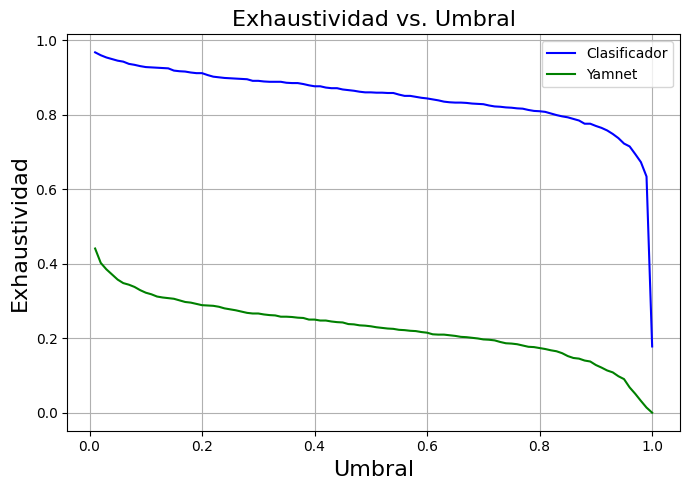

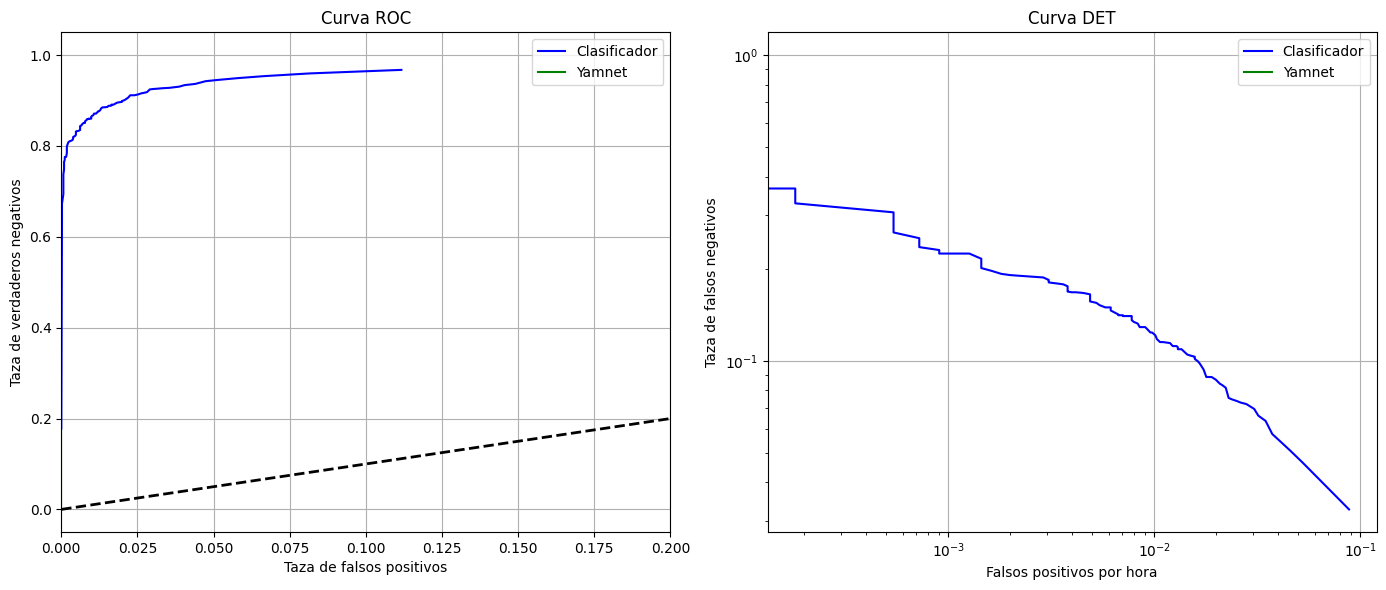

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, det_curve

def plot_precision_recall_vs_threshold_comparison(metrics1, metrics2, model1_name='Model 1', model2_name='Model 2'):
    thresholds1 = metrics1['threshold']
    precision1 = metrics1['precision']
    recall1 = metrics1['recall']

    thresholds2 = metrics2['threshold']
    precision2 = metrics2['precision']
    recall2 = metrics2['recall']

    fig, ax = plt.subplots(1, 1, figsize=(7, 5))
    
    # Precision vs. Threshold
    #ax[0].plot(thresholds1, precision1, label=f'{model1_name}', color='b')
    #ax[0].plot(thresholds2, precision2, label=f'{model2_name}', color='g')
    #ax[0].set_xlabel('Umbral')
    #ax[0].set_ylabel('Precisión')
    #ax[0].set_title('Precisión vs. Umbral')
    #ax[0].legend()
    #ax[0].grid(True)
    
    # Recall vs. Threshold
    ax.plot(thresholds1, recall1, label=f'{model1_name}', color='b')
    ax.plot(thresholds2, recall2, label=f'{model2_name}', color='g')
    ax.set_xlabel('Umbral', fontsize=16)
    ax.set_ylabel('Exhaustividad', fontsize=16)
    ax.set_title('Exhaustividad vs. Umbral', fontsize=16)
    ax.legend()
    ax.grid(True)
    
    plt.tight_layout()
    plt.show()

def plot_roc_det_curve_comparison(metrics1, metrics2, model1_name='Model 1', model2_name='Model 2'):
    time1 = metrics1['tp'][0] + metrics1['fp'][0] + metrics1['tn'][0] + metrics1['fn'][0]
    time2 = metrics2['tp'][0] + metrics2['fp'][0] + metrics2['tn'][0] + metrics2['fn'][0]
    
    for key in metrics1.keys():
        metrics1[key] = np.array(metrics1[key])
    
    for key in metrics2.keys():
        metrics2[key] = np.array(metrics2[key])

    tpr1 = metrics1['recall']
    fpr1 =  metrics1['fp'] / (metrics1['fp'] + metrics1['tn'])
    
    tpr2 = metrics2['recall']
    fpr2 =  metrics2['fp'] / (metrics2['fp'] + metrics2['tn'])

    fph1 = metrics1['fp'] / time1
    fnr1 = metrics1['fn'] / (metrics1['fn'] + metrics1['tp'])

    fph2 = metrics2['fp'] / time2
    fnr2 = metrics2['fn'] / (metrics2['fn'] + metrics2['tp'])

    fig, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    # ROC Curve
    ax[0].plot(fpr1, tpr1, label=f'{model1_name}', color='b')
    ax[0].plot(fpr2, tpr2, label=f'{model2_name}', color='g')
    ax[0].plot([0, 1], [0, 1], 'k--', lw=2)
    ax[0].set_xlabel('Taza de falsos positivos')
    ax[0].set_ylabel('Taza de verdaderos negativos')
    ax[0].set_xlim([0, 0.2])
    ax[0].set_title('Curva ROC')
    ax[0].legend()
    ax[0].grid(True)
    
    # DET Curve
    ax[1].plot(fph1, fnr1, label=f'{model1_name}', color='b')
    ax[1].plot(fph2, fnr2, label=f'{model2_name}', color='g')
    ax[1].set_yscale('log')
    ax[1].set_xscale('log')
    ax[1].set_xlabel('Falsos positivos por hora')
    ax[1].set_ylabel('Taza de falsos negativos')
    ax[1].set_title('Curva DET')
    ax[1].legend()
    ax[1].grid(True)
    
    plt.tight_layout()
    plt.show()

# Example usage:
# Assuming 'metrics1' and 'metrics2' are dictionaries for model 1 and model 2 respectively
# 'y_true1' and 'y_pred1' are the true labels and predicted probabilities for model 1
# 'y_true2' and 'y_pred2' are the true labels and predicted probabilities for model 2

plot_precision_recall_vs_threshold_comparison(metrics, metrics_yamnet, model1_name='Clasificador', model2_name='Yamnet')
plot_roc_det_curve_comparison(metrics, metrics_yamnet, model1_name='Clasificador', model2_name='Yamnet')



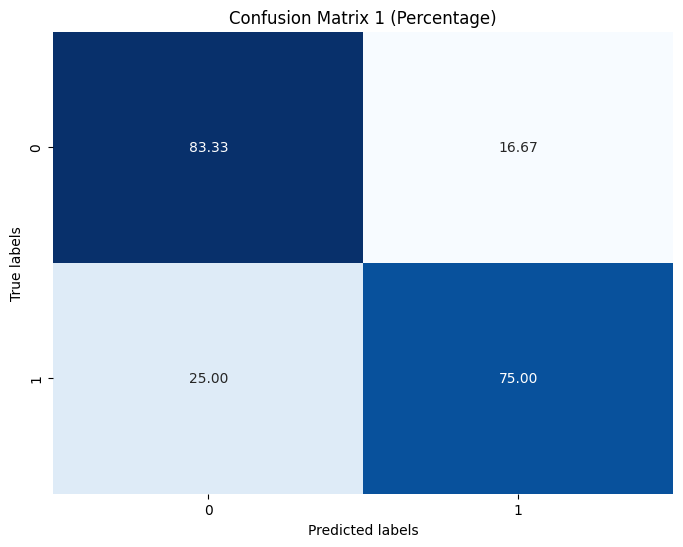

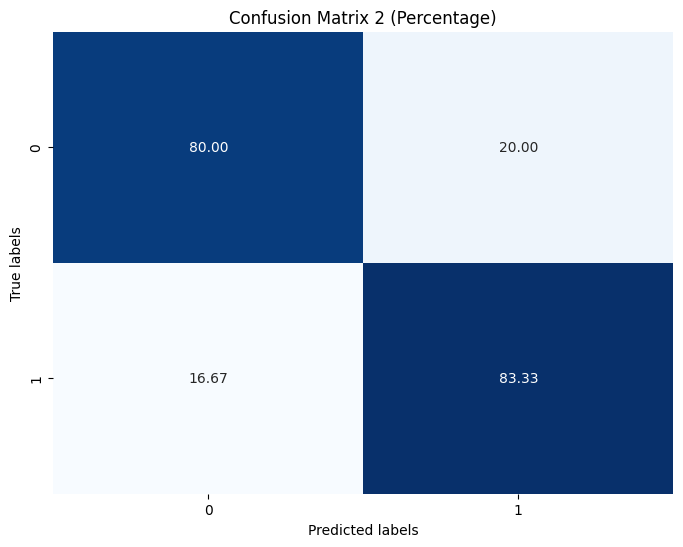

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Valores de TP, FP, TN y FN para dos conjuntos
tp1, fp1, tn1, fn1 = 50, 10, 30, 10
tp2, fp2, tn2, fn2 = 60, 15, 25, 5

# Crear las matrices de confusión
cm1 = np.array([[tp1, fp1],
                [fn1, tn1]])

cm2 = np.array([[tp2, fp2],
                [fn2, tn2]])

# Función para convertir la matriz de confusión a porcentajes
def to_percentage(cm):
    cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    return cm_percentage * 100

cm1_percentage = to_percentage(cm1)
cm2_percentage = to_percentage(cm2)

# Función para plotear la matriz de confusión
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt=".2f", cmap='Blues', cbar=False)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(title)
    plt.show()

# Graficar las matrices de confusión
plot_confusion_matrix(cm1_percentage, 'Confusion Matrix 1 (Percentage)')
plot_confusion_matrix(cm2_percentage, 'Confusion Matrix 2 (Percentage)')


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Datos proporcionados
VP = [702, 701, 694, 696]
VN = [1211, 1209, 1211, 1210]
FP = [15, 17, 15, 16]
FN = [36, 37, 44, 42]

POS ¿ 
NEG
# Función para crear una matriz de confusión
def crear_matriz_confusion(VP, VN, FP, FN):
    return np.array([[VP, FN],
                     [FP, VN]])

# Crear las cuatro matrices de confusión
matrices_confusion = [crear_matriz_confusion(VP[i], VN[i], FP[i], FN[i]) for i in range(4)]

# Plotear las matrices de confusión
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

for i, matriz in enumerate(matrices_confusion):
    sns.heatmap(matriz, annot=True, fmt="d", cmap="Blues", cbar=False, ax=axes[i])
    axes[i].set_title(f"Matriz de Confusión {i+1}")
    axes[i].set_xlabel("Predicción")
    axes[i].set_ylabel("Real")
    axes[i].set_xticklabels(['Positivo', 'Negativo'])
    axes[i].set_yticklabels(['Positivo', 'Negativo'])

plt.tight_layout()
plt.show()


In [19]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_io as tfio
import numpy as np
import csv
import io

import seaborn as sns
import matplotlib.pyplot as plt


# Load the model.
model = hub.load('https://www.kaggle.com/models/google/yamnet/TensorFlow2/yamnet/1')

# Input: 3 seconds of silence as mono 16 kHz waveform samples.
def load_wav_16k_mono(filename):
    """ Load a WAV file, convert it to a float tensor, resample to 16 kHz single-channel audio. """
    file_contents = tf.io.read_file(filename)
    wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)
    wav = tf.squeeze(wav, axis=-1)
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)
    
    return wav

waveform = load_wav_16k_mono('res\\2024-07-05_11-31-36.wav')

# Run the model, check the output.
scores, embeddings, log_mel_spectrogram = model(waveform)
scores.shape.assert_is_compatible_with([None, 521])
embeddings.shape.assert_is_compatible_with([None, 1024])
log_mel_spectrogram.shape.assert_is_compatible_with([None, 64])

# Find the name of the class with the top score when mean-aggregated across frames.
def class_names_from_csv(class_map_csv_text):
  """Returns list of class names corresponding to score vector."""
  class_map_csv = io.StringIO(class_map_csv_text)
  class_names = [display_name for (class_index, mid, display_name) in csv.reader(class_map_csv)]
  class_names = class_names[1:]  # Skip CSV header
  return class_names
class_map_path = model.class_map_path().numpy()
class_names = class_names_from_csv(tf.io.read_file(class_map_path).numpy().decode('utf-8'))
print(class_names[scores.numpy().argmax(axis=1)])  # Should print 'Silence'.

TypeError: only integer scalar arrays can be converted to a scalar index

In [22]:
preds_yamnet = ['1' if class_names[i] == 'Chainsaw' else 0 for i in scores.numpy().argmax(axis=1)]


[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 '1',
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 '1',
 '1',
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 '1',
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 '1',
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 '1',
 '1',
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 '1',
 '1',
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0

### Exporto el yamnet + mis capas como un solo modelo

In [14]:
from yamnet import params as yamnet_params
from yamnet import yamnet as yamnet_model

def load_wav_16k_mono(filename):
    """ Load a WAV file, convert it to a float tensor, resample to 16 kHz single-channel audio. """
    file_contents = tf.io.read_file(filename)
    wav, sample_rate = tf.audio.decode_wav(
          file_contents,
          desired_channels=1)
    wav = tf.squeeze(wav, axis=-1)
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)
    return wav


params = yamnet_params.Params(patch_hop_seconds=0.96)
yamnet = yamnet_model.yamnet_frames_model(params)
yamnet.load_weights('C:\\Users\\user\\Documents\\Tesis\\codigo\\yamnet\\yamnet.h5')
yamnet.traineable = False

yamnet_input  = yamnet.input
yamnet_output = yamnet(yamnet_input)[1]
output_final  = classifier.model(yamnet_output)
modelo_final  = tf.keras.Model(inputs=yamnet_input, outputs=output_final)
modelo_final.compile()
modelo_final.save('modelo_final_bn')

#classifier.model.save('modelo_propio')


INFO:tensorflow:Assets written to: modelo_final_bn\assets


### Convierto a tflite

In [1]:
import tensorflow as tf

# Convert the model
converter = tf.lite.TFLiteConverter.from_saved_model('modelo_final_bn') # path to the SavedModel directory
tflite_model = converter.convert()

# Save the model.
with open('modelo_final.tflite', 'wb') as f:
  f.write(tflite_model)


: 

In [1]:
import tensorflow as tf

# Convert the model
converter = tf.lite.TFLiteConverter.from_saved_model('modelo_final') # path to the SavedModel directory

# Enable float16 quantization
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_types = [tf.float16]

# Convert the model to TensorFlow Lite format with float16 quantization
tflite_model = converter.convert()

# Save the model.
with open('modelo_final_float16.tflite', 'wb') as f:
  f.write(tflite_model)

In [ ]:
filepath1 = 'C:\\Users\\user\\Documents\\Tesis\\dataset\\audios\\1-19898-A-41.wav'
filepath2 = 'C:\\Users\\user\\Documents\\Tesis\\dataset\\audios\\75263__garybran__heavyfootstompsinforest-1.wav'
motosierra = load_wav_16k_mono(filepath1)
bosque     = load_wav_16k_mono(filepath2)

modelo = tf.keras.models.load_model("modelo_final")

print(modelo(motosierra))
print('--------------')
print(modelo(bosque))

tf.Tensor(
[[0.9999857]
 [0.9999397]
 [1.       ]
 [0.9999953]
 [1.       ]
 [0.9952451]], shape=(6, 1), dtype=float32)
--------------
tf.Tensor(
[[0.0016734 ]
 [0.00352934]
 [0.00254762]
 [0.00211295]
 [0.00035775]
 [0.09869838]], shape=(6, 1), dtype=float32)


### Optimizacion

In [4]:
from yamnet import params as yamnet_params
from yamnet import yamnet as yamnet_model

def load_wav_16k_mono(filename):
    """ Load a WAV file, convert it to a float tensor, resample to 16 kHz single-channel audio. """
    file_contents = tf.io.read_file(filename)
    wav, sample_rate = tf.audio.decode_wav(
          file_contents,
          desired_channels=1)
    wav = tf.squeeze(wav, axis=-1)
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)
    return wav

filepath1 = 'C:\\Users\\user\\Documents\\Tesis\\dataset\\audios\\1-19898-A-41.wav'
filepath2 = 'C:\\Users\\user\\Documents\\Tesis\\dataset\\audios\\75263__garybran__heavyfootstompsinforest-1.wav'
motosierra = load_wav_16k_mono(filepath1)

params = yamnet_params.Params(patch_hop_seconds=0.96, TM=0.2, FM=0.2)
yamnet = yamnet_model.yamnet_frames_model(params)
yamnet.load_weights('C:\\Users\\user\\Documents\\Tesis\\codigo\\yamnet\\yamnet.h5')
yamnet.traineable = False

scores, embeddings, stft = yamnet(motosierra)


In [55]:
import librosa
def add_white_noise(tensor, snr_dB):
    # Calculate the power of the original signal
    signal_power = tf.reduce_mean(tf.square(tensor))
    
    # Convert SNR from dB to linear scale
    snr_linear = tf.pow(10.0, snr_dB / 10.0)
    
    # Calculate noise power
    noise_power = signal_power / snr_linear
    
    # Generate white noise with the same shape as the input tensor
    noise = tf.random.normal(tf.shape(tensor), stddev=tf.sqrt(noise_power))
    
    # Add noise to the input tensor
    noisy_tensor = tensor + noise
    
    return noisy_tensor

def pitch_shift(signal, steps):
    # Convert TensorFlow tensor to NumPy array
    input_array = signal.numpy()

    # Perform pitch shift using librosa
    pitch_shifted_array = librosa.effects.pitch_shift(input_array, sr=16000, n_steps=steps)  # Assuming sampling rate of 44100 Hz and pitch shift of 2 semitones

    # Convert the pitch-shifted NumPy array back to TensorFlow tensor
    pitch_shifted_tensor = tf.constant(pitch_shifted_array, dtype=tf.float32)
    return pitch_shifted_tensor


def plot_spectrogram(tensor, title='Spectrogram'):
    # Convert tensor to NumPy array
    tensor_np = tensor.numpy()
    
    # Calculate spectrogram    
    # Plot spectrogram
    plt.imshow(tensor_np, aspect='auto', origin='lower') #, extent=[times.min(), times.max(), frequencies.min(), frequencies.max()])
    plt.xlabel('Time')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.colorbar(label='Intensity (dB)')
    plt.show()

In [5]:
spectrogram_hop_length_samples = int(round(params.sample_rate * params.stft_hop_seconds))
spectrogram_sample_rate = params.sample_rate / spectrogram_hop_length_samples
patch_window_length_samples = int(round(spectrogram_sample_rate * params.patch_window_seconds))
patch_hop_length_samples = int(round(spectrogram_sample_rate * params.patch_hop_seconds))
features = tf.signal.frame(
        signal=stft,
        frame_length=patch_window_length_samples,
        frame_step=patch_hop_length_samples,
        axis=0)
features

<tf.Tensor: shape=(6, 96, 64), dtype=float32, numpy=
array([[[-4.426276  , -3.8136888 , -3.909086  , ..., -4.2971425 ,
         -4.5174313 , -4.6094394 ],
        [-3.382997  , -3.5896857 , -4.5780907 , ..., -3.961965  ,
         -4.5379214 , -4.7375965 ],
        [-3.4838333 , -3.7317836 , -4.4966288 , ..., -4.151671  ,
         -3.8152423 , -4.578981  ],
        ...,
        [ 0.813667  ,  0.55188423,  0.30065954, ...,  0.40556756,
          0.26622447, -0.5711235 ],
        [ 0.15503533, -0.08355621,  0.7519841 , ...,  0.9878304 ,
          0.34129146,  0.3472483 ],
        [ 0.72728455,  0.9616052 ,  0.7920667 , ...,  0.9668622 ,
          0.8843853 ,  0.9467148 ]],

       [[ 0.74652135,  0.14266506,  0.54959786, ...,  0.5659682 ,
          0.4108854 ,  0.09977674],
        [ 0.82860696,  0.63213134,  0.41412857, ...,  0.36817676,
          0.4187264 , -0.48190033],
        [ 0.1795836 , -0.01125681,  0.78713894, ...,  1.4111152 ,
          1.5740588 ,  1.5168401 ],
        ...,
 

In [8]:
for i in range(tf.shape(features)[0]):
    print(i)

0
1
2
3
4
5


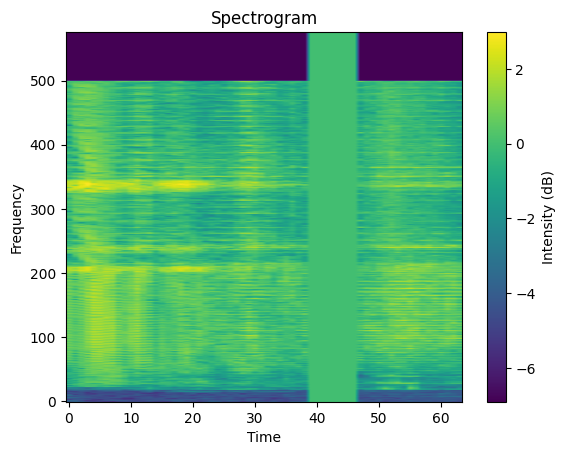

In [146]:
stft_time_masked = tfio.audio.time_mask(stft, param=50)
stft_freq_masked = tfio.audio.freq_mask(stft, param=10)

plot_spectrogram(stft_freq_masked)

In [47]:
import sounddevice as sd
import numpy as np
import tensorflow as tf
import time


# Define constants for audio recording
SAMPLE_RATE = 16000  # Sample rate (Hz)
CHANNELS = 1         # Number of audio channels
BLOCK_LENGHT = int(0.96*SAMPLE_RATE)

try:
    model_path = 'C:\\Users\\user\\Documents\\Tesis\\codigo\\modelo_final.tflite'
    interpreter = tf.lite.Interpreter(model_path)

    input_details = interpreter.get_input_details()
    waveform_input_index = input_details[0]['index']
    output_details = interpreter.get_output_details()
    scores_output_index = output_details[0]['index']

    interpreter.resize_tensor_input(waveform_input_index, [int(0.96*16000)], strict=False)
    interpreter.allocate_tensors()

except:
    print('Error cargando el modelo')

# Function to process audio data
def process_audio(indata, frames, time, status):
    # Convert audio data to numpy array
    audio_data = np.asarray(indata, np.float32)
    audio_data = audio_data.reshape(-1)

    interpreter.set_tensor(waveform_input_index, audio_data)
    interpreter.invoke()
    output = interpreter.get_tensor(scores_output_index)
    
    if output > 0.9:
        print('Motosierra!')
    else:
        print('Todo ok')
    

    # Calculate amplitude (absolute maximum) of audio samples
    
# Open a stream for audio input
stream = sd.InputStream(callback=process_audio, blocksize=int(0.96*16000), 
                        samplerate=SAMPLE_RATE, channels=CHANNELS, dtype=np.float32)

print("Recording... Press Ctrl+C to stop.")

# Start audio stream
with stream:
    try:
        # Keep the stream open until interrupted by Ctrl+C
        while True:
            pass
    except KeyboardInterrupt:
        pass

print("Finished recording.")



Recording... Press Ctrl+C to stop.
Todo ok
Todo ok
Todo ok
Todo ok
Todo ok
Todo ok
Todo ok
Todo ok
Todo ok
Todo ok
Todo ok
Todo ok
Todo ok
Finished recording.


In [31]:
model_path = 'modelo_final.tflite'
interpreter = tf.lite.Interpreter(model_path)

def load_wav_16k_mono(filename):
    """ Load a WAV file, convert it to a float tensor, resample to 16 kHz single-channel audio. """
    file_contents = tf.io.read_file(filename)
    wav, sample_rate = tf.audio.decode_wav(
          file_contents,
          desired_channels=1)
    wav = tf.squeeze(wav, axis=-1)
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)
    return wav

input_details = interpreter.get_input_details()
waveform_input_index = input_details[0]['index']
output_details = interpreter.get_output_details()
scores_output_index = output_details[0]['index']

# Input: 0.975 seconds of silence as mono 16 kHz waveform samples.
filepath1 = 'C:\\Users\\user\\Documents\\Tesis\\dataset\\audios\\1-19898-A-41.wav'
waveform = load_wav_16k_mono(filepath1)

interpreter.resize_tensor_input(waveform_input_index, [tf.shape(waveform)[0]], strict=True)
interpreter.allocate_tensors()
interpreter.set_tensor(waveform_input_index, waveform)
interpreter.invoke()
scores = interpreter.get_tensor(scores_output_index)
print(scores)  # Should print (1, 521)



[[0.9999857 ]
 [0.99993956]
 [1.        ]
 [0.9999953 ]
 [1.        ]
 [0.9952452 ]]


In [ ]:
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_types = [tf.float16]

tflite_fp16_model = converter.convert()
tflite_model_fp16_file = tflite_models_dir/"mnist_model_quant_f16.tflite"
tflite_model_fp16_file.write_bytes(tflite_fp16_model)


### Cortando negativos otra vez

In [ ]:
import os
import soundfile as sf

enteros = '..\\dataset\\bosques\\Enteros'
cortados = '..\\dataset\\bosques'

In [ ]:
for file in os.listdir(enteros):
    filepath = os.path.join(enteros, file)
    
    sr = sf.info(filepath).samplerate

    
    bloques = sf.blocks(filepath, blocksize=sr*5)
    n = 1
    
    for block in bloques:
        if sf.info(filepath).channels == 2:
            block = (block[:,0] + block[:,1])        
        fname = f'{file[:-4]}-{n}.wav'
        sf.write(os.path.join(cortados, fname), block, samplerate = sr)
        n += 1

In [ ]:
lst = []
for i in os.listdir(cortados):
    dic = {'filename':i,
           'category':0}
    lst.append(dic)
lst
df2 = pd.DataFrame(lst)

In [ ]:
import pandas as pd
df = pd.read_csv("..\\metadata.csv")
df = df[df.category != 0]

concatenated_df = pd.concat([df, df2])

# Reset index if needed
concatenated_df.reset_index(drop=True, inplace=True)
concatenated_df.to_csv("..\\metadata.csv", index=False)